In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import data_utils as du

noc = "HUN"
df = pd.read_csv("athlete_events.csv")
hungary = df[df["NOC"] == noc]
hungary


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
208,99,Pter Abay,M,30.0,181.0,79.0,Hungary,HUN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Sabre, Team",Silver
209,100,Oszkr Abay-Nemes,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 100 metres Freestyle,NaN
210,100,Oszkr Abay-Nemes,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze
884,507,Attila brahm,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",Bronze
885,507,Attila brahm,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270750,135406,Bla Zulawszky,M,38.0,NaN,NaN,Hungary,HUN,1908 Summer,1908,Summer,London,Fencing,"Fencing Men's epee, Individual",NaN
270751,135406,Bla Zulawszky,M,38.0,NaN,NaN,Hungary,HUN,1908 Summer,1908,Summer,London,Fencing,"Fencing Men's Sabre, Individual",Silver
270752,135406,Bla Zulawszky,M,42.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Foil, Individual",NaN
270753,135406,Bla Zulawszky,M,42.0,NaN,NaN,Hungary,HUN,1912 Summer,1912,Summer,Stockholm,Fencing,"Fencing Men's Sabre, Individual",NaN


In [3]:

sportcount = hungary['Sport'].value_counts()
sportcount


Sport
Gymnastics                   1242
Athletics                     767
Swimming                      719
Fencing                       628
Canoeing                      306
Water Polo                    304
Shooting                      298
Wrestling                     279
Handball                      205
Rowing                        194
Football                      132
Cycling                       121
Boxing                        110
Weightlifting                  99
Alpine Skiing                  99
Modern Pentathlon              93
Art Competitions               87
Equestrianism                  84
Sailing                        77
Judo                           76
Speed Skating                  68
Biathlon                       67
Figure Skating                 61
Basketball                     61
Tennis                         60
Short Track Speed Skating      56
Cross Country Skiing           51
Volleyball                     47
Ice Hockey                     40
Diving  

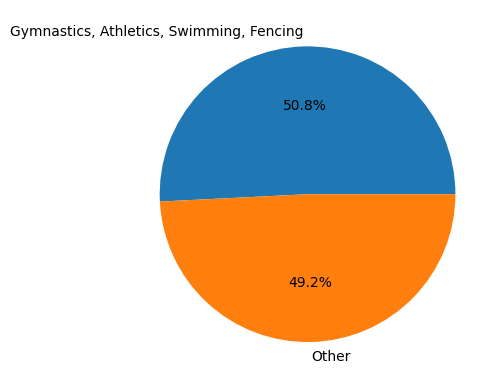

In [4]:
major_sports = sportcount[0:4].sum()
minor_sports = sportcount[4:].sum()

plt.pie([major_sports, minor_sports], labels=["Gymnastics, Athletics, Swimming, Fencing", "Other"], autopct="%1.1f%%")
plt.show()

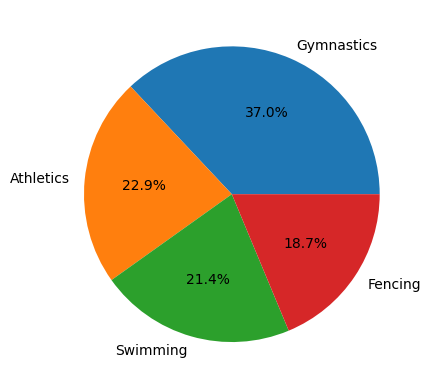

In [5]:
plt.pie(sportcount[0:4], labels=sportcount[0:4].index, autopct="%1.1f%%")
plt.show()

In [6]:
Gold = hungary[hungary['Medal'] == 'Gold']
Gold.groupby('Sport')['Medal'].count().sort_values(ascending=False)

Sport
Water Polo           107
Fencing              103
Canoeing              52
Football              46
Swimming              36
Gymnastics            20
Wrestling             19
Modern Pentathlon     17
Athletics             11
Boxing                10
Shooting               7
Weightlifting          2
Art Competitions       1
Judo                   1
Name: Medal, dtype: int64

In [7]:
waterpolo_gold = hungary[(hungary['Sport'] == 'Water Polo') & (hungary['Medal'] == 'Gold')]
waterpolo_gold.sort_values('Year', ascending=False)[waterpolo_gold['Year'] == 2008].count()

C:\Users\jonat\AppData\Local\Temp\ipykernel_18276\2501165867.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  waterpolo_gold.sort_values('Year', ascending=False)[waterpolo_gold['Year'] == 2008].count()


ID        13
Name      13
Sex       13
Age       13
Height    13
Weight    13
Team      13
NOC       13
Games     13
Year      13
Season    13
City      13
Sport     13
Event     13
Medal     13
dtype: int64

<Axes: ylabel='Sex-None'>

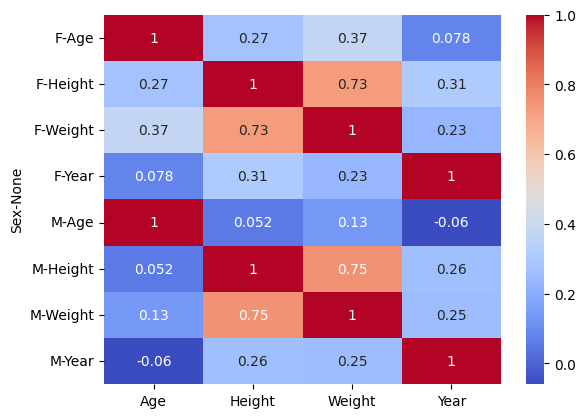

In [8]:
group = hungary.drop(columns='ID')
corr = group.groupby('Sex').corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

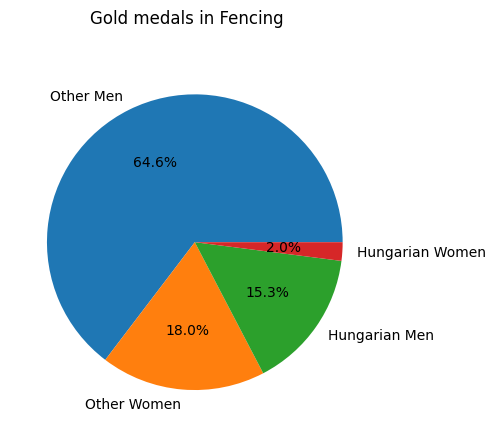

In [9]:
nothungary = df[df['NOC'] != 'HUN']
othergold = nothungary[(nothungary['Medal'] == 'Gold') & (nothungary['Sport'] == 'Fencing')]
fencegold = Gold[Gold['Sport'] == 'Fencing']
otherM = othergold[othergold['Sex'] == 'M']
otherF = othergold[othergold['Sex'] == 'F']
fencegoldM = fencegold[fencegold['Sex'] == 'M']
fencegoldF = fencegold[fencegold['Sex'] == 'F']
plt.pie([len(otherM), len(otherF), len(fencegoldM), len(fencegoldF)], labels=['Other Men', 'Other Women', 'Hungarian Men', 'Hungarian Women'], autopct="%1.1f%%")
plt.suptitle('Gold medals in Fencing')
plt.show()


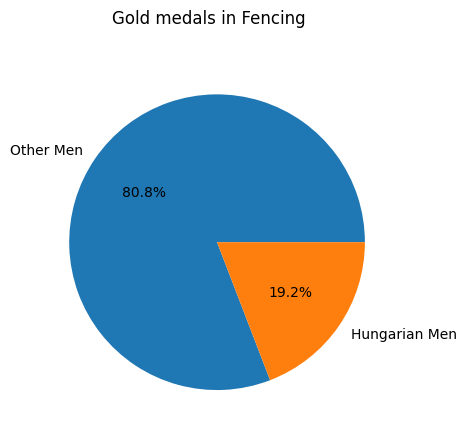

In [10]:
plt.pie([len(otherM),len(fencegoldM)], labels=['Other Men','Hungarian Men'], autopct="%1.1f%%")
plt.suptitle('Gold medals in Fencing')
plt.show()

In [11]:
print(fencegoldM['Name'].value_counts())
print(fencegoldM['Name'].value_counts().sum())

Name
Aladr Gerevich (-Gerei)          7
Pl dm Kovcs                      6
Rudolf Krpti                     6
Jen Fuchs (-Fekete)              4
Gyz Kulcsr                       4
Endre Kabos                      3
Tibor Berczelly (Berczeller-)    3
Csaba Fenyvesi                   3
Lszl Rajcsnyi                    3
Gyrgy Piller (Jekelfalussy-)     2
Zoltn Nemere                     2
Lajos Werkner                    2
Dezs Fldes                       2
Oszkr Gerde                      2
Gyula Glykais                    2
Bence Szab                       2
Attila Petschauer                2
Pl Schmitt                       2
Pter Tth                         2
ron Szilgyi                      2
Bertalan Papp                    2
dn von Tersztynszky              2
Imre Gedvri                      1
Sndor Erds                       1
Lszl Berti (Berty)               1
Jnos Garay                       1
Tams Gbor                        1
rpd Brny                         1
Imre Bujdos    

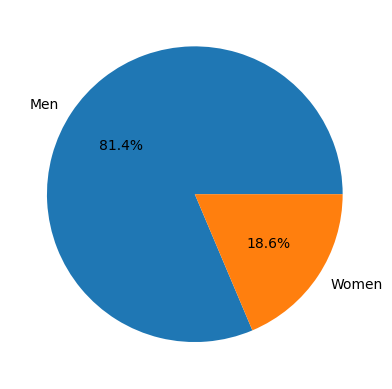

In [12]:
plt.pie(
    [
        len(df[(df['Sex'] == 'M') & (df['Sport'] == 'Fencing')]),
        len(df[(df['Sex'] == 'F') & (df['Sport'] == 'Fencing')])
    ],
    labels=['Men', 'Women'],
    autopct="%1.1f%%"
)
plt.show()

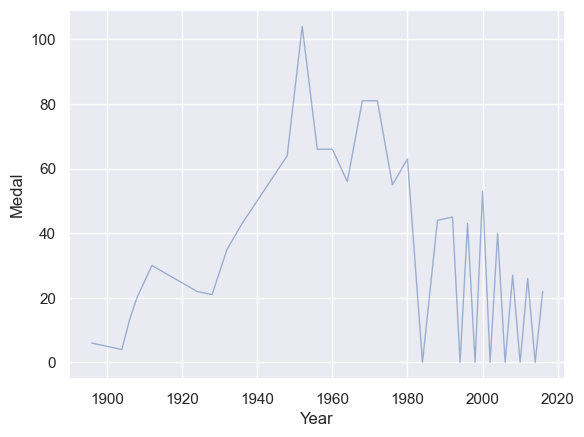

In [15]:

goldtime = hungary.groupby('Year')['Medal'].count()
sns.set_theme(style="darkgrid")
sns.lineplot(data=goldtime, alpha=0.5, linewidth=1)
plt.show()

['Summer' 'Winter']
['Summer' 'Winter']
[nan 'Silver' 'Bronze']
                bronze  silver
Sport                         
Figure Skating       8       4


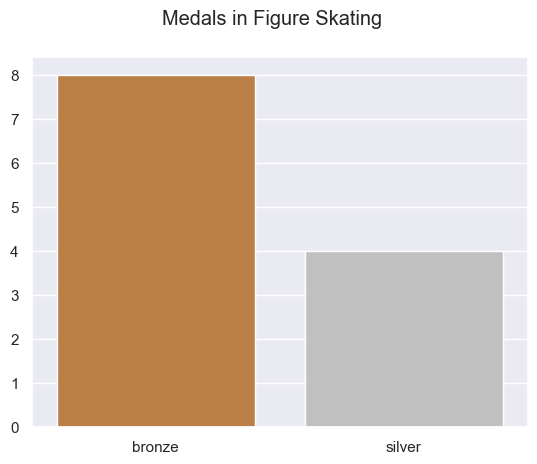

In [39]:
print(df['Season'].unique())
print(hungary['Season'].unique())

wintermedal_hungary =hungary[hungary['Season'] == 'Winter']
print(wintermedal_hungary['Medal'].unique())
winterbronze = wintermedal_hungary[wintermedal_hungary['Medal'] == 'Bronze']
wintersilver = wintermedal_hungary[wintermedal_hungary['Medal'] == 'Silver']
bronze = winterbronze.groupby('Sport')['Medal'].count()
silver = wintersilver.groupby('Sport')['Medal'].count()
medals = pd.DataFrame({'bronze': bronze, 'silver': silver})
print(medals)
sns.barplot(medals, palette=["#CD7F32", "#C0C0C0"],)
plt.suptitle("Medals in Figure Skating")
plt.show()



<Axes: xlabel='Sport,Sex'>

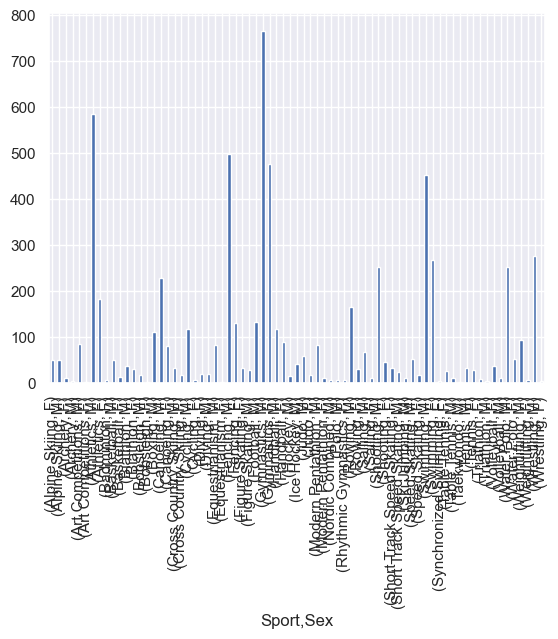

In [ ]:


group = hungary.groupby('Sport')['Sex'].value_counts()
group.plot(kind='bar')
#sns.barplot(gmen, hue=gmen.index, palette=["#CD7F32", "#C0C0C0"],)